# Aula 4 - Projeto Prático

![](../../data/imagem/banner-pos-2022.jpg)

## Classificador de Sorrisos com Redes Neurais Convolucionais (CNN)

Neste projeto, nós iremos construir uma Rede Neural Convolucional (CNN) para resolver um problema de classificação de imagens. O objetivo é ensinar o modelo a identificar, a partir de uma imagem do rosto de uma pessoa, se ela está sorrindo ou não está sorrindo.

### 📂 Sobre o Dataset

Vamos utilizar um dataset composto por close-ups de rostos humanos, já organizados em duas categorias:

* 📁 smile: contém imagens de pessoas sorrindo.
* 📁 non_smile: contém imagens de pessoas sem sorriso.

Essas imagens serão utilizadas para treinar e testar nosso modelo de aprendizado profundo. 

### Objetivo

Nós iremos:

* Preparar o dataset: organizar as imagens, aplicar pré-processamento e divisão em treino/teste.
* Construir uma CNN com TensorFlow/Keras: criar uma rede que aprenda a extrair padrões visuais para detectar sorrisos.
* Treinar o modelo com os dados rotulados.
* Avaliar a performance do modelo com métricas apropriadas (acurácia, matriz de confusão, etc.).

# Carregamento e Pré-processamento do Dataset (MNIST)

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# Configurações iniciais

In [13]:
# Tamanho das imagens para entrada da rede
IMAGE_SIZE = (150, 150) 
# Quantidade de imagens por lote 
BATCH_SIZE = 32          
# Número de épocas para treinamento
EPOCHS = 20              
# Caminho da pasta contendo as subpastas 'smile' e 'non_smile'
DATASET_PATH = "../../data/Face_Data-Smiling_or_Not" 

os.listdir(DATASET_PATH)

['smile', 'non_smile']

# Pré-processamento de dados com Data Augmentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Utilizamreos o ImageDataGenerator para:
# - Reescalar os pixels para o intervalo [0, 1]
# - Realizar aumentos artificiais nos dados (data augmentation)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # Separa 20% dos dados para validação
    rotation_range=20,     # Rotação aleatória até 20 graus
    zoom_range=0.2,        # Zoom aleatório
    width_shift_range=0.2, # Deslocamento horizontal
    height_shift_range=0.2,# Deslocamento vertical
    horizontal_flip=True   # Espelhamento horizontal
)

In [16]:
# Geradores de dados para treino e validação
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',       # Como temos duas classes, usamos classificação binária
    subset='training',
    shuffle=True
)

Found 963 images belonging to 2 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 240 images belonging to 2 classes.


# Construção do Modelo de Deep Learning

In [19]:
from tensorflow.keras import layers, models

In [21]:
# ----------------------------------------
# Arquitetura de uma CNN simples com dropout para reduzir overfitting
model = models.Sequential([    
    layers.Input((150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout para evitar overfitting
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Saída com ativação sigmoide para classificação binária
])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

# Compilação do Modelo

In [ ]:
# - Usamos 'binary_crossentropy' para classificação binária
# - 'adam' é um otimizador eficiente e amplamente utilizado
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Callbacks

In [24]:
from tensorflow.keras import callbacks

In [ ]:
# Callbacks ajudam a controlar o treinamento:
# - EarlyStopping: para evitar overfitting, interrompe o treino se a validação parar de melhorar
# - ModelCheckpoint: salva o melhor modelo com base na acurácia de validação
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = callbacks.ModelCheckpoint(
    "best_model.h5",       # Nome do arquivo salvo
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Treinamento do Modelo

In [ ]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stop, checkpoint]
)

/home/octavio/anaconda3/envs/curso_visao_computacional/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


2025-06-03 15:56:33.140366: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 89718784 exceeds 10% of free system memory.
2025-06-03 15:56:33.578926: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-06-03 15:56:34.547504: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2025-06-03 15:56:34.682566: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29859840 exceeds 10% of free system memory.
2025-06-03 15:56:35.092620: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4619 - loss: 1.0047
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.4625 - loss: 0.9983 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5146 - loss: 0.6935
Epoch 2: val_accuracy did not improve from 0.50000
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5140 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5179 - loss: 0.6935
Epoch 3: val_accuracy did not improve from 0.50000
31/31 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5179 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 937ms/step - accuracy: 0.4747 - loss: 0.6936
Epoch 4: val_accuracy did not improve from 0.50000
31/31 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4747 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step - accuracy: 0.5085 - loss: 0.6929
Epoch 5: val_accuracy did not improve from 0.5000

31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4979 - loss: 0.6930 - val_accuracy: 0.5917 - val_loss: 0.6928
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5589 - loss: 0.6924
Epoch 7: val_accuracy did not improve from 0.59167
31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5578 - loss: 0.6924 - val_accuracy: 0.5292 - val_loss: 0.6906
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.5276 - loss: 0.6898
Epoch 8: val_accuracy improved from 0.59167 to 0.61667, saving model to best_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5278 - loss: 0.6897 - val_accuracy: 0.6167 - val_loss: 0.6874
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.5755 - loss: 0.6897
Epoch 9: val_accuracy did not improve from 0.61667
31/31 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5744 - loss: 0.6899 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4843 - loss: 0.6968
Epoch 10: val_accuracy did not improve from 0.61667
31/31 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.4855 - loss: 0.6967 - val_accuracy: 0.6000 - val_loss: 0.6840
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.5597 - loss: 0.6799
Epoch 11: val_accuracy did not improve from 0.61667
31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 874ms/step - accuracy: 0.5600 - loss: 0.6797 - val_accuracy: 0.5583 - val_loss: 0.6917
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.5948 - loss: 0.6697
Epoch 12: val_accuracy improved from 0

31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 817ms/step - accuracy: 0.5955 - loss: 0.6694 - val_accuracy: 0.6458 - val_loss: 0.6654
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.6502 - loss: 0.6434
Epoch 13: val_accuracy improved from 0.64583 to 0.66250, saving model to best_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 850ms/step - accuracy: 0.6499 - loss: 0.6434 - val_accuracy: 0.6625 - val_loss: 0.6237
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.7030 - loss: 0.5899
Epoch 14: val_accuracy improved from 0.66250 to 0.71667, saving model to best_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 29s 903ms/step - accuracy: 0.7031 - loss: 0.5897 - val_accuracy: 0.7167 - val_loss: 0.5838
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.6796 - loss: 0.6083
Epoch 15: val_accuracy improved from 0.71667 to 0.72500, saving model to best_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 29s 927ms/step - accuracy: 0.6796 - loss: 0.6088 - val_accuracy: 0.7250 - val_loss: 0.5933
Epoch 16/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.7194 - loss: 0.5555
Epoch 16: val_accuracy did not improve from 0.72500
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7191 - loss: 0.5560 - val_accuracy: 0.7208 - val_loss: 0.5867
Epoch 17/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.7332 - loss: 0.5423
Epoch 17: val_accuracy improved from 0.72500 to 0.80833, saving model to best_model.h5


31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7335 - loss: 0.5421 - val_accuracy: 0.8083 - val_loss: 0.4984
Epoch 18/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.7600 - loss: 0.5460
Epoch 18: val_accuracy did not improve from 0.80833
31/31 ━━━━━━━━━━━━━━━━━━━━ 28s 879ms/step - accuracy: 0.7598 - loss: 0.5458 - val_accuracy: 0.7500 - val_loss: 0.5189
Epoch 19/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.7835 - loss: 0.4828
Epoch 19: val_accuracy did not improve from 0.80833
31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 793ms/step - accuracy: 0.7834 - loss: 0.4832 - val_accuracy: 0.7708 - val_loss: 0.5000
Epoch 20/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.8103 - loss: 0.4465
Epoch 20: val_accuracy did not improve from 0.80833
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 837ms/step - accuracy: 0.8104 - loss: 0.4465 - val_accuracy: 0.7708 - val_loss: 0.5346


In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

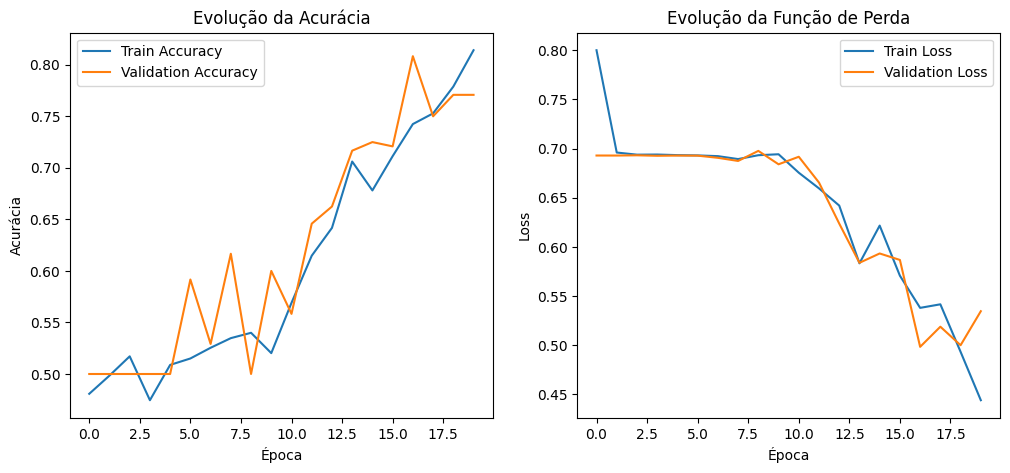

In [28]:
plt.figure(figsize=(12, 5))

# Gráfico de Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Evolução da Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Evolução da Função de Perda')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Avaliação Final

In [31]:
loss, acc = model.evaluate(validation_generator, verbose=False)
print(f"\nAcurácia final na validação: {acc:.4f}")


Acurácia final na validação: 0.7667
